# Unsupervised Machine Learning

# K-Means Clustering


![image.png](attachment:image.png)

### Install 'yellowbrick' package

In [1]:
%pip install yellowbrick

In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

### Problem Statement - Classify Similar Customers Based on

#### 1. 2 Variables -  Income & Spending
#### 2. 3 Variables - Age, Income & Spending

## Step 1: Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 2: Perform Basic Data Quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [6]:
df.duplicated().sum()

0

## Step 3: Separate X from dataframe

#### There are no Target (Y) features in Unsupervised ML
#### in this dataset for X there are only numerical features so only 'num_pipe' required to be created

In [7]:
X = df[['Income','Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 3(i) Plot Scatterplot

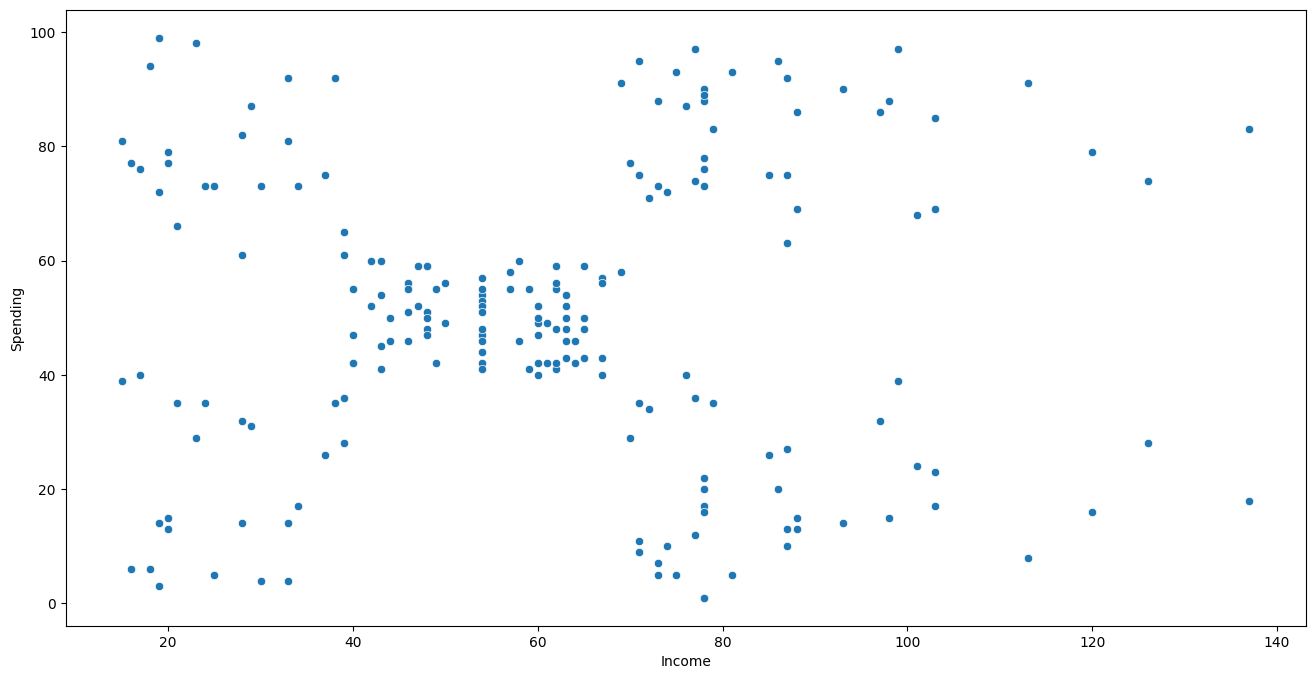

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending')
plt.show()

## Step 4: Preprocessing Data for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Step 5: Finding Optimal Number of Clusters with yellowbrick

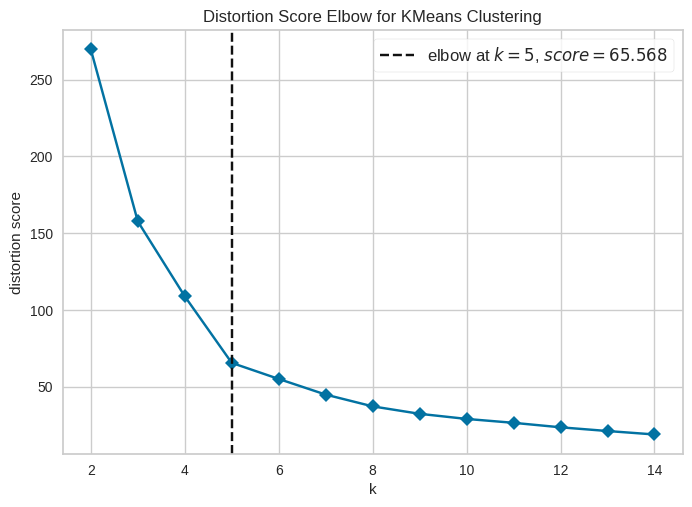

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15), timings=False)
visualizer.fit(X_pre)
visualizer.show()
plt.show()

### Conlusion on Step 5: From above visulaizer elbow is found at k=5

## Step 6: Create K-Means algorithm with k=5 i.e. number of clusters

In [13]:
best_kmeans = KMeans(n_clusters=5)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

## Step 7: Save above results in X

In [14]:
X['Cluster'] = clusters
X.head()

,Income,Spending,Cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


## Step 8: CLusters and Centroids

### 8(i) Check for each (any) cluster --> 0,1,...4 --> since k=5

In [15]:
X[X['Cluster']==0]

,Income,Spending,Cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [16]:
X[X['Cluster']==1]

,Income,Spending,Cluster
1,15,81,1
3,16,77,1
5,17,76,1
7,18,94,1
9,19,72,1
11,19,99,1
13,20,77,1
15,20,79,1
17,21,66,1
19,23,98,1


### 8(ii) Create function to get values for each cluster label

In [17]:
for i in range(5):
    print(f'Cluster Number " {i}')
    display(X[X['Cluster']==i])
    print('\n-----------------------------------------------------------\n')

Cluster Number " 0


,Income,Spending,Cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0



-----------------------------------------------------------

Cluster Number " 1


,Income,Spending,Cluster
1,15,81,1
3,16,77,1
5,17,76,1
7,18,94,1
9,19,72,1
11,19,99,1
13,20,77,1
15,20,79,1
17,21,66,1
19,23,98,1



-----------------------------------------------------------

Cluster Number " 2


,Income,Spending,Cluster
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2



-----------------------------------------------------------

Cluster Number " 3


,Income,Spending,Cluster
123,69,91,3
125,70,77,3
127,71,95,3
129,71,75,3
131,71,75,3
133,72,71,3
135,73,88,3
137,73,73,3
139,74,72,3
141,75,93,3



-----------------------------------------------------------

Cluster Number " 4


,Income,Spending,Cluster
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4



-----------------------------------------------------------



### 8(iii) Clculate centroids for each cluster

In [18]:
centroids = X.groupby(by='Cluster').mean()
centroids

,Income,Spending
Cluster,,
0,55.296296,49.518519
1,25.727273,79.363636
2,88.200000,17.114286
3,86.538462,82.128205
4,26.304348,20.913043


### 8(iv) Visulaize CLuster with Centroids

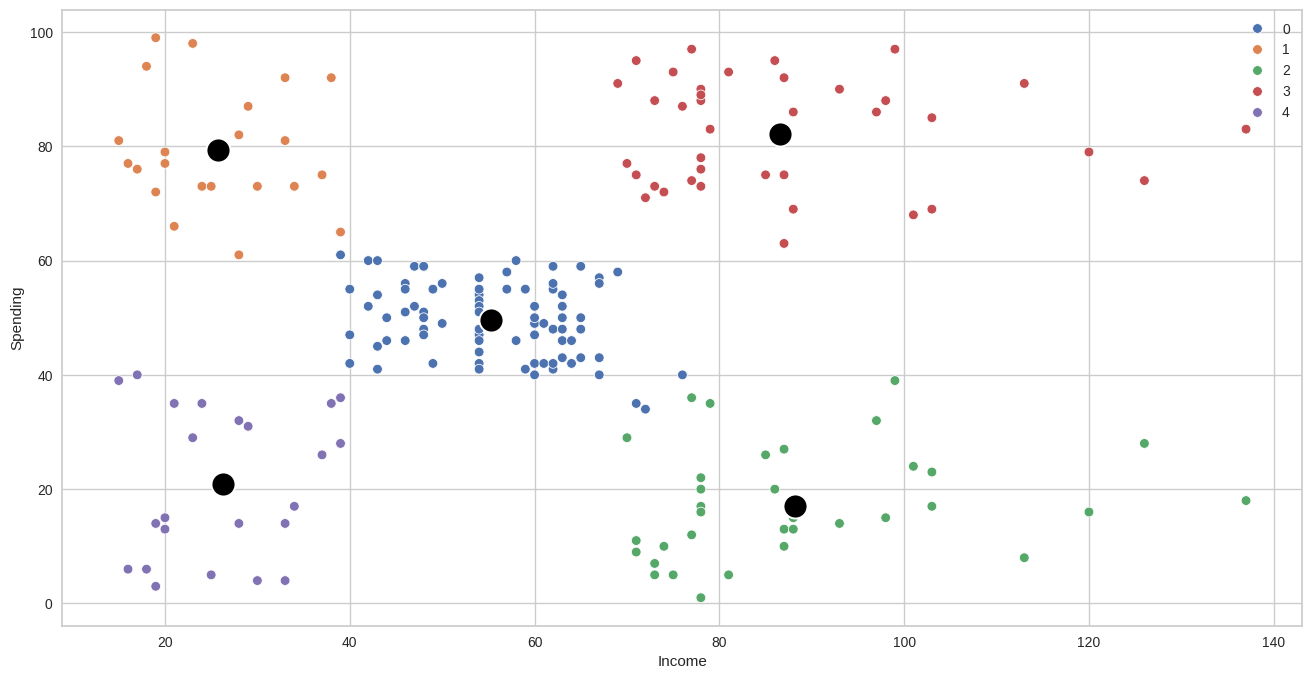

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Cluster', palette='deep')
sns.scatterplot(data=centroids, x='Income', y='Spending', color='black', markers='+', s=300)
plt.show()

## Step 9: Save results to csv

In [20]:
X.to_csv('Results-2variable.csv', index=False)

# Multiple Variable for K-Means

## Step 3: Separate X from df

### Step 1-2 same as above

#### 3 variables --> age, income, spending are numerical --> so no need for cat & con
#### only num_pipe required here

In [21]:
X2 = df[['Age', 'Income', 'Spending']]
X2.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 4: Preprocessing Data for X2

In [22]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [23]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 5: Apply K-Elbow Visualizer

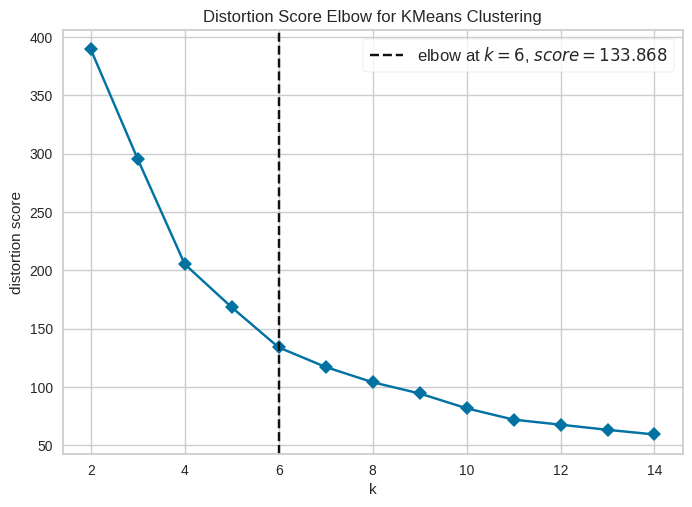

In [24]:
model2 = KMeans()
visualizer2 = KElbowVisualizer(model2, k=(2,15), timings=False)
visualizer2.fit(X2_pre)
visualizer2.show()
plt.show()

### Conlusion on Step 5: From above visulaizer elbow is found at k=6

## Stpe 6: Create K-Means model

In [25]:
km2 = KMeans(n_clusters=6)
clusters2 = km2.fit_predict(X2_pre)
clusters2

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 5, 2, 5, 3, 5, 3, 5, 3, 5,
       2, 5, 3, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 1, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5], dtype=int32)

## Step 7: Save above results to X2

In [26]:
X2['Cluster'] = clusters2
X2.head()

,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


## Step 8: Cluster and Centroids

### 8(i) check individual cluster

In [27]:
X2[X2['Cluster']==0]

,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0


### 8(ii) Function to get all culster segmentation

In [28]:
for i in range(6):
    print(f'Cluster Number : {i}')
    display(X2[X2['Cluster']==i])
    print('\n-------------------------------------------------------------------\n')

Cluster Number : 0


,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0



-------------------------------------------------------------------

Cluster Number : 1


,Age,Income,Spending,Cluster
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1



-------------------------------------------------------------------

Cluster Number : 2


,Age,Income,Spending,Cluster
47,27,40,47,2
48,29,40,42,2
49,31,40,42,2
51,33,42,60,2
52,31,43,54,2
58,27,46,51,2
61,19,46,55,2
65,18,48,59,2
68,19,48,59,2
69,32,48,47,2



-------------------------------------------------------------------

Cluster Number : 3


,Age,Income,Spending,Cluster
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3



-------------------------------------------------------------------

Cluster Number : 4


,Age,Income,Spending,Cluster
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4



-------------------------------------------------------------------

Cluster Number : 5


,Age,Income,Spending,Cluster
123,39,69,91,5
125,31,70,77,5
127,40,71,95,5
129,38,71,75,5
131,39,71,75,5
133,31,72,71,5
135,29,73,88,5
137,32,73,73,5
139,35,74,72,5
141,32,75,93,5



-------------------------------------------------------------------



### 8(iii) Calculate Centroid for each cluster

In [29]:
centroids2 = X2.groupby(by='Cluster').mean()
centroids2

,Age,Income,Spending
Cluster,,,
0,25.250000,25.833333,76.916667
1,56.333333,54.266667,49.066667
2,26.684211,57.578947,47.789474
3,41.939394,88.939394,16.969697
4,45.523810,26.285714,19.380952
5,32.692308,86.538462,82.128205


### 8(iv) Visualize Cluster with Centroids

### For 3 varaible sctterplot import plotly nbformat package

In [30]:
%pip install plotly nbformat

In [33]:
from plotly.express import scatter_3d
fig = scatter_3d(data_frame=X2, x='Age', y='Income', z='Spending', color='Cluster')
fig.show()

### 3D scatterplot will not be siplayed in Github as it is an interactive element and Github doesnt support it

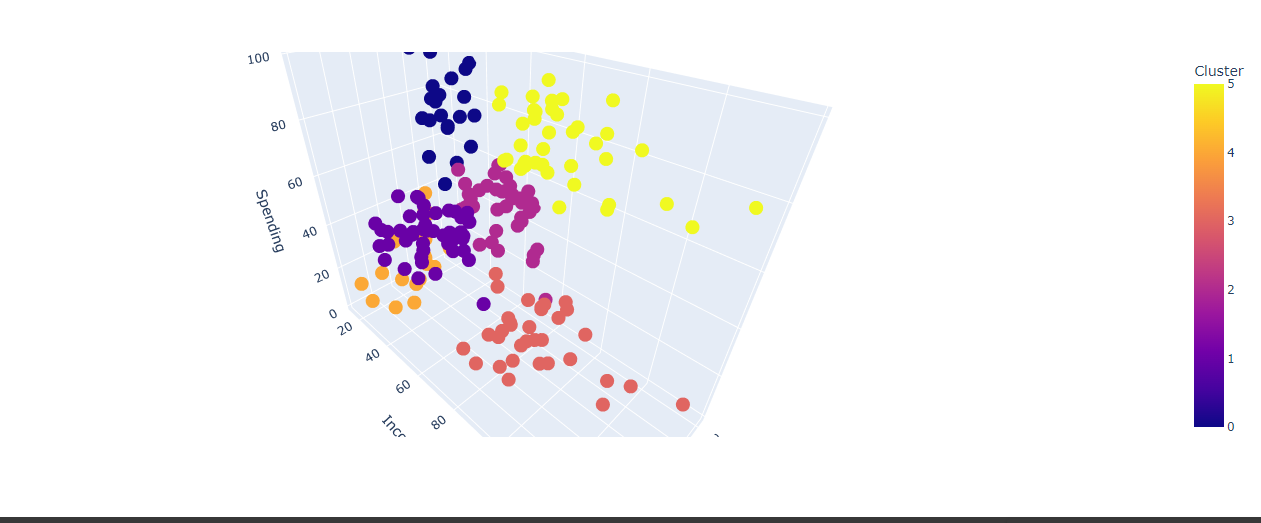

## Step 9: Save the results to csv

In [32]:
X2.to_csv('Results_3variable.csv', index=False)

## Step 10: Push files to GitHub

#### SAve All files before pushing them to GitHub

1. git add .
2. git commit -m "Class 24 - 30.03 - K-Means Clustering"
3. git push -u origin main